In [19]:
import os, string
import pandas as pd


years = range(2011,2017)



for year in years:
    filename = 'university rankings/ranking'+str(year)+'.txt'
    statsname = 'university rankings/ranking'+str(year)+'-stats.txt'
    textfile = open(filename, 'r')
    statsfile = open(statsname, 'r')

    lines = textfile.readlines()
    lines2 = statsfile.readlines()

    ranks = []
    title = []
    country = []
    Teaching = []
    International = []
    Research = []
    Citations = []
    Income = []
    Overall = []
    NumStudents = []
    StudentStaffRatio = []
    InternationalStudents = []
    FemaleMaleRatio = []

    for (line_index, line) in enumerate(lines):
        

        words = line.split('\t')
        stats = lines2[line_index].split('\t')
        
        print year, words,stats
        if line_index % 3 == 0:
            ranks.append(words[0])
            title.append(words[1])
        elif line_index % 3 ==1:
            country.append(words[0])
        elif line_index % 3 ==2:
            Teaching.append(words[0])
            International.append(words[1])
            Research.append(words[2])
            Citations.append(words[3])
            Income.append(words[4])
            Overall.append(words[5])
            if len(stats)==1:
                NumStudents.append('')
                StudentStaffRatio.append('')
                InternationalStudents.append('')
                FemaleMaleRatio.append('')
            else:
                NumStudents.append(stats[0])
                StudentStaffRatio.append(stats[1])
                InternationalStudents.append(stats[2])
                FemaleMaleRatio.append(stats[3])


    data = pd.DataFrame([ranks,title,country,Teaching, International, Research, Citations, Income, Overall,\
                         NumStudents,StudentStaffRatio,InternationalStudents,FemaleMaleRatio]).transpose()
    data.columns = ['rank', 'school_name', 'country', 'teaching', 'international', 'research', 'citations','income',\
                    'overall','num_students','student_staff_ratio','international_students','female_male_ratio']

    data = data.replace({'\n': ''}, regex=True)
    data = data.replace({'Array:':''},regex=True)
    #print data
    
    data['Year'] = year
    
    if year ==2011:
        alldata = data
    else:
        alldata = alldata.append(data,ignore_index=True)




2011 ['1', 'Harvard University\n'] ['1', 'Harvard University\n']
2011 ['United States of America\n'] ['United States of America\n']
2011 ['99.7', '72.4', '98.7', '98.8', '34.5', '96.1', '+\n'] ['20,152', '8.9', '25%', 'Array', '+\n']
2011 ['2', 'California Institute of Technology\n'] ['2', 'California Institute of Technology\n']
2011 ['United States of America\n'] ['United States of America\n']
2011 ['97.7', '54.6', '98.0', '99.9', '83.7', '96.0', '+\n'] ['2,243', '6.9', '27%', '33 : 67', '+\n']
2011 ['3', 'Massachusetts Institute of Technology\n'] ['3', 'Massachusetts Institute of Technology\n']
2011 ['United States of America\n'] ['United States of America\n']
2011 ['97.8', '82.3', '91.4', '99.9', '87.5', '95.6', '+\n'] ['11,074', '9', '33%', '37 : 63', '+\n']
2011 ['4', 'Stanford University\n'] ['4', 'Stanford University\n']
2011 ['United States of America\n'] ['United States of America\n']
2011 ['98.3', '29.5', '98.1', '99.2', '64.3', '94.3', '+\n'] ['15,596', '7.8', '22%', '42 : 5

In [20]:
alldata.head()

,rank,school_name,country,teaching,international,research,citations,income,overall,num_students,student_staff_ratio,international_students,female_male_ratio,Year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,Array,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [21]:
alldata.to_csv('timesData.csv',index=False)

In [22]:
shanghai = pd.read_csv('shanghaiData.csv')

In [23]:
school_and_country = alldata[['school_name','country']]


In [24]:
school_and_country = school_and_country.drop_duplicates(subset=['school_name'])

In [26]:
school_and_country

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America
5,University of Cambridge,United Kingdom
6,University of Oxford,United Kingdom
7,"University of California, Berkeley",United States of America
8,Imperial College London,United Kingdom
9,Yale University,United States of America


In [27]:
shanghai = shanghai.merge(school_and_country, left_on='Institution',right_on='school_name')

In [28]:
shanghai.head()

,World Rank,Institution,National Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,school_name,country
0,1,Harvard University,1,100,100,100,100,100,100,72.4,2005,Harvard University,United States of America
1,1,Harvard University,1,100,100,100,100,100,100,73.6,2006,Harvard University,United States of America
2,1,Harvard University,1,100,100,100,100,100,100,73.0,2007,Harvard University,United States of America
3,1,Harvard University,1,100,100,100,100,100,100,74.1,2008,Harvard University,United States of America
4,1,Harvard University,1,100,100,100,100,100,100,74.8,2009,Harvard University,United States of America


In [31]:
shanghai = shanghai.sort(columns=['Year','World Rank'])


In [32]:
shanghai.head()

,World Rank,Institution,National Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,school_name,country
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,Harvard University,United States of America
87,10,University of Oxford,2,59.7,64.3,59.1,48.4,55.6,68.4,53.2,2005,University of Oxford,United Kingdom
692,100,Tufts University,53,23.9,18.8,17.1,20.8,19.1,37.4,25.2,2005,Tufts University,United States of America
1019,101-152,University of Virginia,54-71,NaN,0.0,0.0,29.4,23.6,47.9,24.0,2005,University of Virginia,United States of America
1009,101-152,University of Tsukuba,6-9,NaN,0.0,20.4,13.6,12.7,42.9,21.3,2005,University of Tsukuba,Japan


In [33]:
school_and_country.to_csv('school_and_country_table.csv',index=False)

In [34]:
shanghai[shanghai.Institution=='National Tsing Hua University']

,World Rank,Institution,National Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,school_name,country
2046,301-400,National Tsing Hua University,2-3,NaN,16.6,0,0.0,5.1,31.5,19.1,2005,National Tsing Hua University,Taiwan
2047,301-400,National Tsing Hua University,2-3,NaN,16.0,0,0.0,4.4,33.4,20.3,2006,National Tsing Hua University,Taiwan
2048,305-402,National Tsing Hua University,2,NaN,15.6,0,0.0,7.4,35.0,21.2,2007,National Tsing Hua University,Taiwan
2049,303-401,National Tsing Hua University,2-4,NaN,14.8,0,0.0,8.5,35.8,22.0,2008,National Tsing Hua University,Taiwan
2050,201-302,National Tsing Hua University,2-3,NaN,14.5,0,0.0,9.5,35.4,22.2,2009,National Tsing Hua University,Taiwan
2051,301-400,National Tsing Hua University,3-4,NaN,14.1,0,0.0,8.9,35.4,21.2,2010,National Tsing Hua University,Taiwan
2052,301-400,National Tsing Hua University,3-4,NaN,14.4,0,0.0,9.4,33.8,19.9,2011,National Tsing Hua University,Taiwan
2053,201-300,National Tsing Hua University,2-3,NaN,13.3,0,10.2,8.5,34.4,20.5,2012,National Tsing Hua University,Taiwan
2054,201-300,National Tsing Hua University,2-3,NaN,12.9,0,5.1,12.6,32.7,20.8,2014,National Tsing Hua University,Taiwan
2055,201-300,National Tsing Hua University,2,NaN,12.6,0,5.1,12.9,32.6,21.1,2015,National Tsing Hua University,Taiwan


In [37]:
schools_to_show = alldata.school_name[:10]
print schools_to_show

0                       Harvard University
1       California Institute of Technology
2    Massachusetts Institute of Technology
3                      Stanford University
4                     Princeton University
5                  University of Cambridge
6                     University of Oxford
7       University of California, Berkeley
8                  Imperial College London
9                          Yale University
Name: school_name, dtype: object


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 8

In [47]:
plot_data = alldata[alldata.school_name.isin(schools_to_show)]
plot_data['rank'] = plot_data['rank'].astype(int)

/Users/wendy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/wendy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


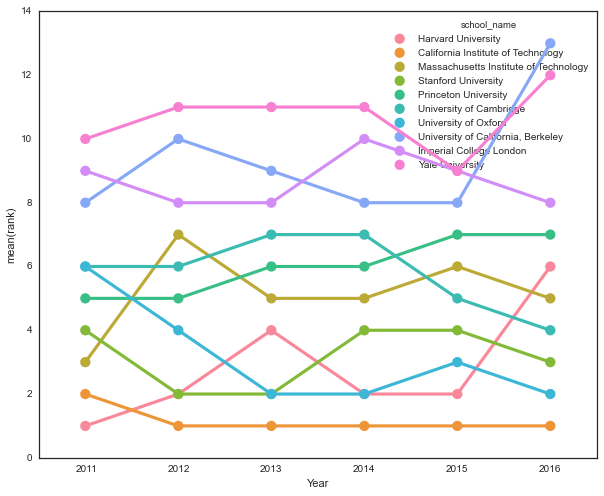

In [49]:
ax = sns.pointplot(x='Year',y='rank',hue='school_name',data=plot_data);
